<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
comp_tot=[]
annual_comp= zip(df['CompFreq'],df['CompTotal'])
for x,y in annual_comp:
    if x=='Yearly':
        comp_tot.append(y)
    elif x=='Monthly':
        comp_tot.append(y*12)
    else:
        comp_tot.append(y*52)

df['NormalizedAnnualCompensation']=comp_tot


In [4]:
columns_with_na = [col for col in df.columns if df[col].isna().any()]
columns_with_na

['OpenSource',
 'Student',
 'EdLevel',
 'UndergradMajor',
 'EduOther',
 'OrgSize',
 'DevType',
 'YearsCode',
 'Age1stCode',
 'YearsCodePro',
 'JobSat',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'LastInt',
 'FizzBuzz',
 'JobFactors',
 'ResumeUpdate',
 'CompTotal',
 'CompFreq',
 'ConvertedComp',
 'WorkWeekHrs',
 'WorkPlan',
 'WorkChallenge',
 'WorkRemote',
 'WorkLoc',
 'ImpSyn',
 'CodeRev',
 'CodeRevHrs',
 'UnitTests',
 'PurchaseHow',
 'PurchaseWhat',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'WebFrameWorkedWith',
 'WebFrameDesireNextYear',
 'MiscTechWorkedWith',
 'MiscTechDesireNextYear',
 'DevEnviron',
 'OpSys',
 'Containers',
 'BlockchainOrg',
 'BlockchainIs',
 'BetterLife',
 'ITperson',
 'OffOn',
 'SocialMedia',
 'Extraversion',
 'ScreenName',
 'SOVisit1st',
 'SOVisitFreq',
 'SOVisitTo',
 'SOFindAnswer',
 'SOTimeSaved',
 'SOHowMuchTime',
 'SOAccount',
 'SOPartFreq',
 'SOJobs',
 '

In [5]:
count=0
for column in columns_with_na:
    if df[column].dtype == 'object':
        mod_val= df[column].mode()[0]
     
        print('the most  frequent value for{} is {}'.format(column,mod_val))
        df[column].fillna(mod_val,inplace=True)
        print('fill null success')
        count += 1
       
    elif df[column].dtype =='float':
        median_val = df[column].median()
        print('the median value for {} is : '.format(column,median_val))
        df[column].fillna(median_val,inplace=True)
        print('mission success ')
        count +=1
        print(count)

the most  frequent value forOpenSource is The quality of OSS and closed source software is about the same
fill null success
the most  frequent value forStudent is No
fill null success
the most  frequent value forEdLevel is Bachelor’s degree (BA, BS, B.Eng., etc.)
fill null success
the most  frequent value forUndergradMajor is Computer science, computer engineering, or software engineering
fill null success
the most  frequent value forEduOther is Taken an online course in programming or software development (e.g. a MOOC);Taught yourself a new language, framework, or tool without taking a formal course
fill null success
the most  frequent value forOrgSize is 20 to 99 employees
fill null success
the most  frequent value forDevType is Developer, full-stack
fill null success
the most  frequent value forYearsCode is 10
fill null success
the most  frequent value forAge1stCode is 15
fill null success
the most  frequent value forYearsCodePro is 3
fill null success
the most  frequent value forJo

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


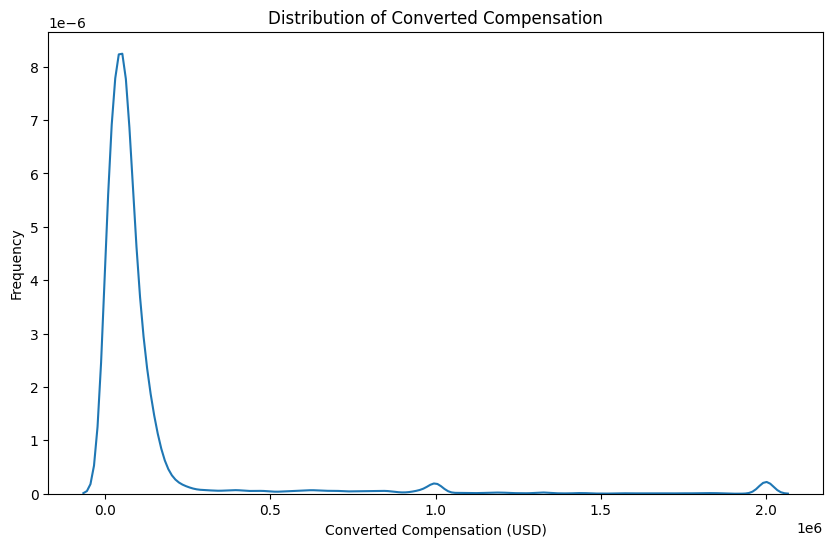

In [7]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['ConvertedComp'], bw_adjust=0.5)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()  #display the distribution plot.

Plot the histogram for the column `ConvertedComp`.


<Axes: xlabel='ConvertedComp', ylabel='Count'>

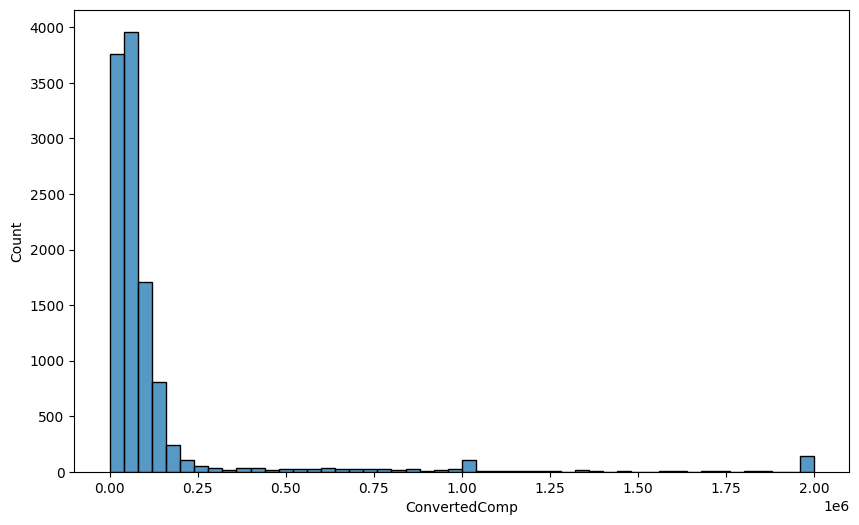

In [8]:
# your code goes here
plt.figure(figsize=(10,6))
sns.histplot(df['ConvertedComp'],bins=50)


What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
print(df['ConvertedComp'].median())

57745.0


How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
print(df['Gender'].eq('Man').sum())


10553


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
salary_by_gender = df.groupby('Gender')['ConvertedComp'].median()
print(salary_by_gender)

Gender
Man                                                            57745.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              66000.0
Woman                                                          57745.0
Woman;Man                                                      25887.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64


In [12]:
# your code goes here
woman_data= df[df['Gender']=='Woman']
woman_data['ConvertedComp'].median()

57745.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


Text(0, 0.5, 'age')

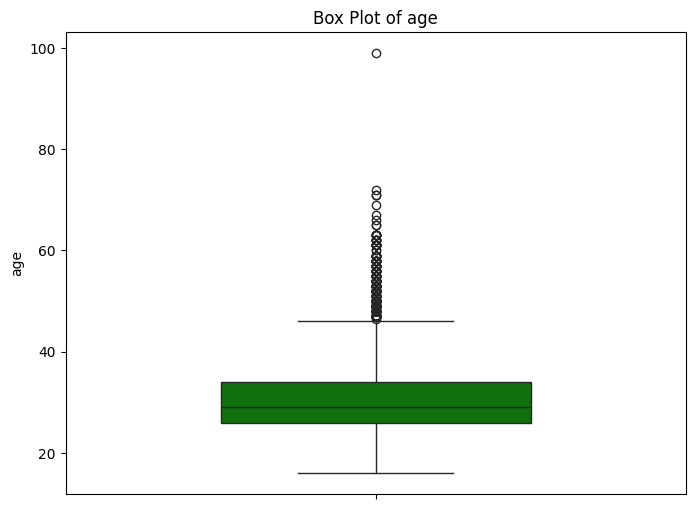

In [13]:
# your code goes here
plt.figure(figsize=(8,6))
sns.boxplot(df['Age'],color='green',width=0.5)
plt.title('Box Plot of age')
plt.ylabel('age')



In [14]:
df['Age'].describe()

count    11398.000000
mean        30.734102
std          7.305317
min         16.000000
25%         26.000000
50%         29.000000
75%         34.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<Axes: ylabel='Frequency'>

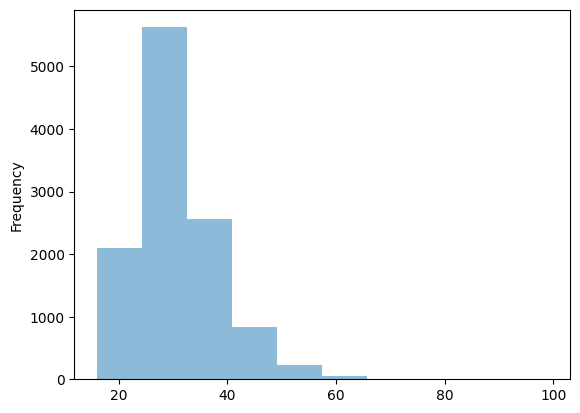

In [15]:
# your code goes here
bin_width=0.5
df['Age'].plot(kind='hist',bins=10,alpha=0.5)


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: ylabel='ConvertedComp'>

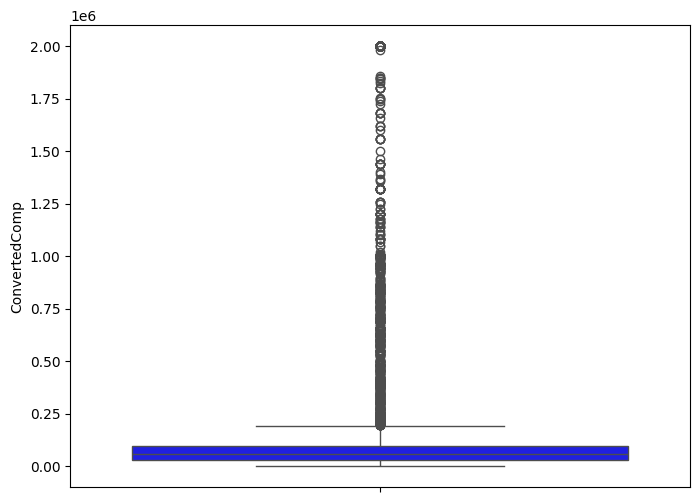

In [16]:
# your code goes here
plt.figure(figsize=(8,6))
sns.boxplot(df['ConvertedComp'],color='blue',)


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [17]:
# your code goes here
q1=df['ConvertedComp'].quantile(0.25)
q3=df['ConvertedComp'].quantile(0.75)
iqr=q3-q1
print('inter quartile range is : ',iqr)


inter quartile range is :  65984.0


Find out the upper and lower bounds.


In [18]:
# your code goes here
lower_bounds= q1-1.5*iqr
print(f'lower bound of  ConvertedComp is : {lower_bounds}')
upper_bounds= q3+1.5*iqr
print(f'upper bound of  ConvertedComp is : {upper_bounds}')

lower bound of  ConvertedComp is : -69960.0
upper bound of  ConvertedComp is : 193976.0


Identify how many outliers are there in the `ConvertedComp` column.


In [19]:
# your code goes here
outliers_below_q1=df[df['ConvertedComp']<(lower_bounds)].shape[0]
print(outliers_below_q1)
outliers_upper_q3=df[df['ConvertedComp']>(upper_bounds)].shape[0]
print(outliers_upper_q3)

0
933


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [20]:
# your code goes here
new_df=df[(df['ConvertedComp']>=lower_bounds) &(df['ConvertedComp']<=upper_bounds) ]
new_df.shape

(10465, 86)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [21]:
# your code goes here
numeric_df=df.select_dtypes(include='number')
numeric_df.shape
correlations=numeric_df.corr()
age_correlations= correlations['Age'].drop('Age')
print(age_correlations)

Respondent                      0.004282
CompTotal                       0.007519
ConvertedComp                   0.101777
WorkWeekHrs                     0.036865
CodeRevHrs                     -0.016941
NormalizedAnnualCompensation   -0.004117
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
